# Epileptic seizure detection from EEG signals using Deep Learning
  
  

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation
import pandas as pd

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Preprocessing

In [2]:
df=pd.read_csv('data.csv')
df.head()

Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9 ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33 ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244 ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85 ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87 ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21 ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

In [3]:
X=df.values

In [4]:
X=X[:,1:-1]


In [5]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [6]:
print(X.shape,y.shape)

(11500, 178) (11500,)


# Intuition of the Epileptical Signal In the Dataset 

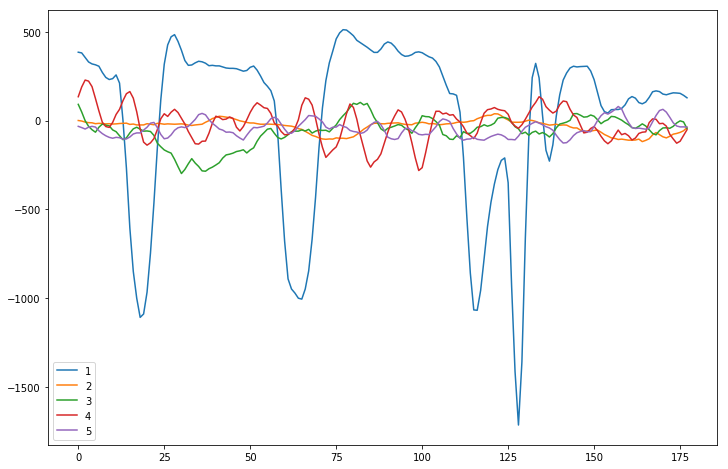

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Creating Artifitial Neural Net Model For the Classification 

In [8]:
model=Sequential()


model.add(Dense(256,input_shape=(45,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               11776     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
__________

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [10]:
model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],10,100,verbose=2,validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:]))

Train on 9200 samples, validate on 2300 samples
Epoch 1/100
 - 3s - loss: 0.3875 - acc: 0.8335 - val_loss: 0.3735 - val_acc: 0.8323
Epoch 2/100
 - 2s - loss: 0.3299 - acc: 0.8489 - val_loss: 0.3124 - val_acc: 0.8479
Epoch 3/100
 - 2s - loss: 0.2606 - acc: 0.8709 - val_loss: 0.2627 - val_acc: 0.8627
Epoch 4/100
 - 2s - loss: 0.2306 - acc: 0.8812 - val_loss: 0.2530 - val_acc: 0.8630
Epoch 5/100
 - 2s - loss: 0.2168 - acc: 0.8876 - val_loss: 0.2731 - val_acc: 0.8650
Epoch 6/100
 - 2s - loss: 0.2080 - acc: 0.8916 - val_loss: 0.2851 - val_acc: 0.8590
Epoch 7/100
 - 2s - loss: 0.1951 - acc: 0.8980 - val_loss: 0.2661 - val_acc: 0.8690
Epoch 8/100
 - 2s - loss: 0.1829 - acc: 0.9039 - val_loss: 0.2904 - val_acc: 0.8700
Epoch 9/100
 - 2s - loss: 0.1746 - acc: 0.9083 - val_loss: 0.3244 - val_acc: 0.8618
Epoch 10/100
 - 2s - loss: 0.1667 - acc: 0.9118 - val_loss: 0.2947 - val_acc: 0.8710
Epoch 11/100
 - 2s - loss: 0.1598 - acc: 0.9148 - val_loss: 0.2985 - val_acc: 0.8739
Epoch 12/100
 - 2s - loss:

Epoch 97/100
 - 2s - loss: 0.0157 - acc: 0.9949 - val_loss: 0.6183 - val_acc: 0.8898
Epoch 98/100
 - 2s - loss: 0.0157 - acc: 0.9954 - val_loss: 0.5372 - val_acc: 0.8943
Epoch 99/100
 - 2s - loss: 0.0080 - acc: 0.9973 - val_loss: 0.6947 - val_acc: 0.8896
Epoch 100/100
 - 2s - loss: 0.0154 - acc: 0.9957 - val_loss: 0.6004 - val_acc: 0.8914


# Accuracy on Validation Set

In [11]:
ypred=model.predict((X_test[:,::4]-X_test.mean())/X_test.std())
ypred.shape

(2300, 5)

In [12]:
yp=np.zeros((Y_test.shape[0]))
yo=np.ones((Y_test.shape[0]))

In [13]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [14]:
yp.shape

(2300,)

In [15]:
yo.shape

(2300,)

In [16]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [17]:
np.unique(Y_test)

array([0., 1.], dtype=float32)

In [18]:
np.unique(yp)

array([1., 2., 3., 4., 5.])

In [19]:
yo.shape

(2300,)

In [20]:
#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [21]:
np.unique(yo)

array([0., 1.])

In [22]:
np.unique(yp)

array([0., 1.])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(yo,yp)

0.9760869565217392